# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citypi

ERROR: Could not find a version that satisfies the requirement citypi (from versions: none)
ERROR: No matching distribution found for citypi
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
print(weather_api_key)
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

626ec48f3c2d394061d20645a92760ae


In [3]:
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
print(weather_api_key)
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

626ec48f3c2d394061d20645a92760ae


In [4]:
##https://api.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&exclude={part}&appid={API key}

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
#This makes the answer a different number each time you press play
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

print(f"Number of cities in the list: {len(cities)}")
#There is a .random makes the answer a different number each time you press play

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?id=524901&units=metric&appid=' + weather_api_key

# Define an empty list to fetch the weather data for each city
#this is storing the CITY data, long, lat, etc. 
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sinnamary
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 1 | uarini
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | taree
Processing Record 8 of Set 1 | itoman
Processing Record 9 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | clyde river
Processing Record 13 of Set 1 | ternate
Processing Record 14 of Set 1 | verkhoyansk
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | odweyne
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | zhanaozen
Processing Record 20 of Set 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sinnamary,5.3833,-52.9500,24.42,87,88,5.48,GF,1675644572
1,port elizabeth,-33.9180,25.5701,24.50,93,75,4.63,ZA,1675644502
2,uarini,-2.9900,-65.1083,22.58,98,100,1.60,BR,1675644685
3,mataura,-46.1927,168.8643,16.85,69,98,4.90,NZ,1675644108
4,longyearbyen,78.2186,15.6401,-2.09,74,75,5.14,SJ,1675644101


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sinnamary,5.3833,-52.9500,24.42,87,88,5.48,GF,1675644572
1,port elizabeth,-33.9180,25.5701,24.50,93,75,4.63,ZA,1675644502
2,uarini,-2.9900,-65.1083,22.58,98,100,1.60,BR,1675644685
3,mataura,-46.1927,168.8643,16.85,69,98,4.90,NZ,1675644108
4,longyearbyen,78.2186,15.6401,-2.09,74,75,5.14,SJ,1675644101


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

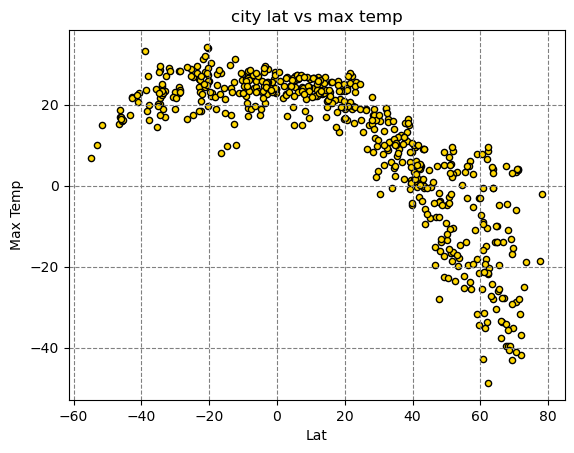

In [11]:
# Build scatter plot for (x)latitude vs. (y)temperature
city_data_df.plot.scatter(x="Lat", y="Max Temp", color="gold", edgecolors = "black")


# Incorporate the other graph properties
plt.title("city lat vs max temp")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.grid(color="grey", linestyle="--")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

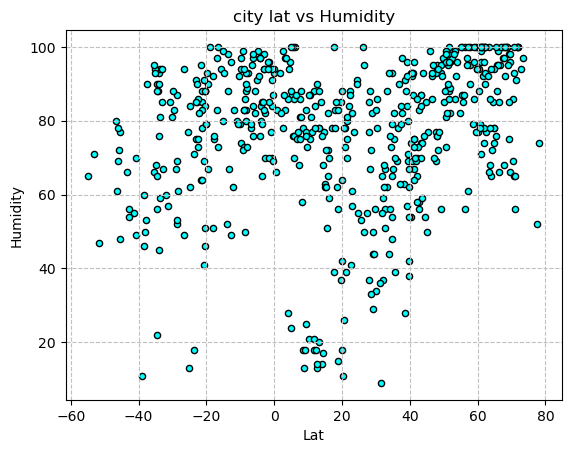

In [12]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x="Lat", y="Humidity", color="cyan", edgecolors = "black")

# Incorporate the other graph properties
plt.title("city lat vs Humidity")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.grid(color="silver", linestyle="--")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

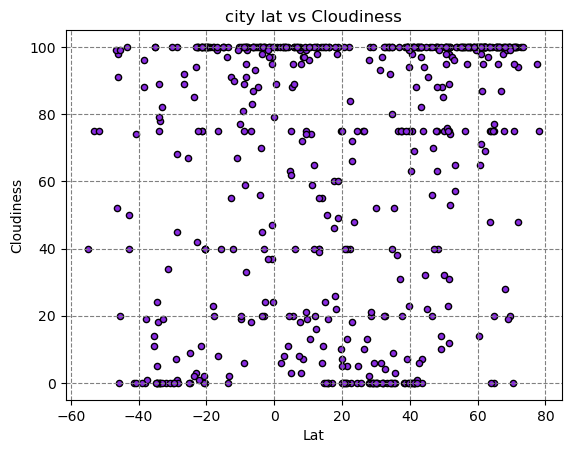

In [13]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x="Lat", y="Cloudiness", color="blueviolet", edgecolors = "black")


# Incorporate the other graph properties
plt.title("city lat vs Cloudiness")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.grid(color="grey", linestyle="--")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

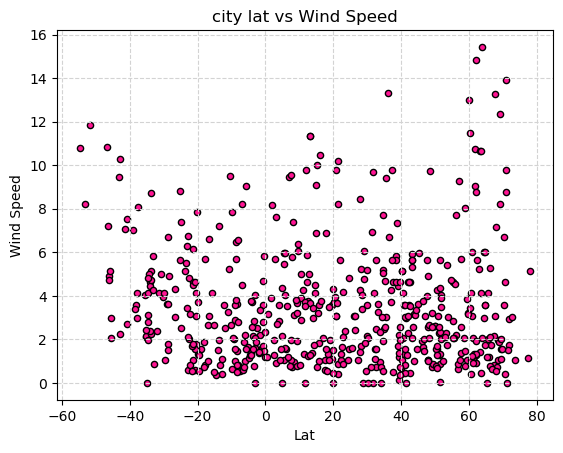

In [14]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x="Lat", y="Wind Speed", color="deeppink", edgecolors = "black")

# Incorporate the other graph properties
plt.title("city lat vs Wind Speed")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.grid(color="lightgray", linestyle="--")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots



In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
weather_data_north = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
weather_data_north.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sinnamary,5.3833,-52.9500,24.42,87,88,5.48,GF,1675644572
4,longyearbyen,78.2186,15.6401,-2.09,74,75,5.14,SJ,1675644101
6,itoman,26.1247,127.6694,19.01,100,75,3.09,JP,1675644413
7,iqaluit,63.7506,-68.5145,-27.95,68,75,4.12,CA,1675644536
8,clyde river,70.4692,-68.5914,-28.87,69,0,3.60,CA,1675644514


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
weather_data_south = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
weather_data_south.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port elizabeth,-33.9180,25.5701,24.50,93,75,4.63,ZA,1675644502
2,uarini,-2.9900,-65.1083,22.58,98,100,1.60,BR,1675644685
3,mataura,-46.1927,168.8643,16.85,69,98,4.90,NZ,1675644108
5,taree,-31.9000,152.4667,28.92,60,0,2.38,AU,1675644686
16,castro,-24.7911,-50.0119,17.50,84,9,2.52,BR,1675644690


###  Temperature vs. Latitude Linear Regression Plot

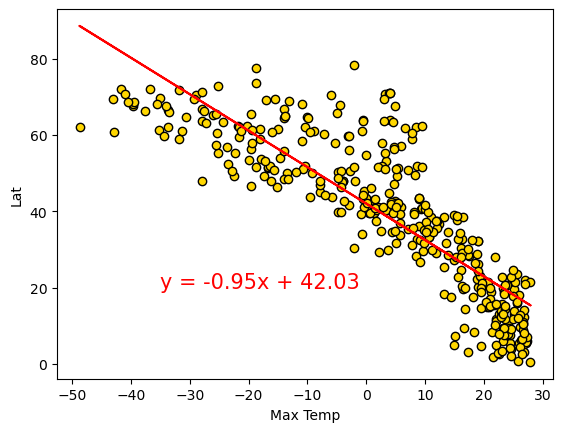

In [18]:
# Linear regression on Northern Hemisphere
x_values = weather_data_north['Max Temp']
y_values = weather_data_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="gold", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,20),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Lat')
plt.show()

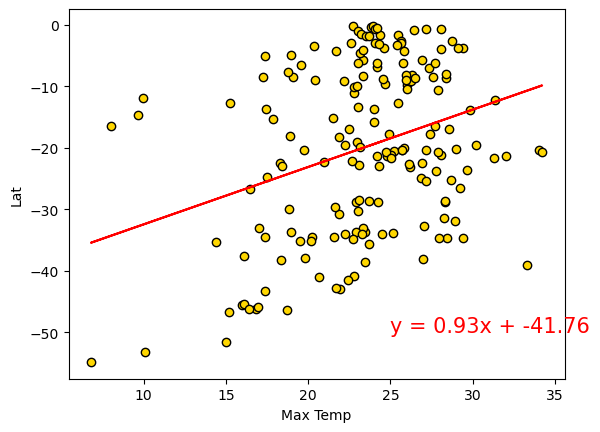

In [19]:
# Linear regression on Southern Hemisphere
x_values = weather_data_south['Max Temp']
y_values = weather_data_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="gold", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,-50),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Lat')
plt.show()

**Discussion about the linear relationship:** 
The plot demonstrates a strong correlation between temperature and latitude on both hemispheres; north is a bit more accurate than the southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.15043775731226874


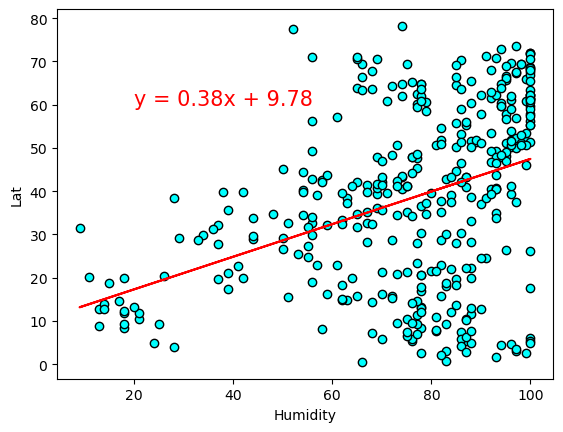

In [20]:
# Northern Hemisphere
x_values = weather_data_north['Humidity']
y_values = weather_data_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="cyan", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,60),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Lat')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.17619797868627726


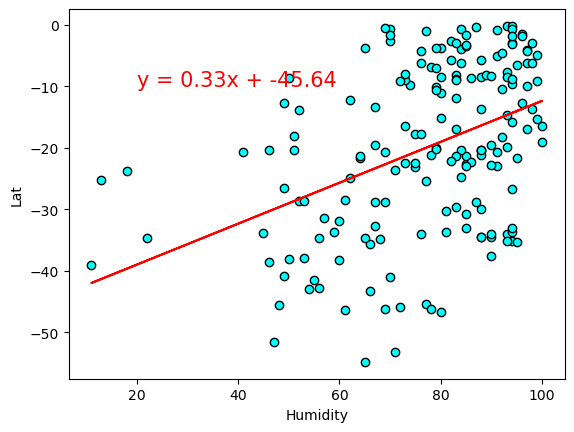

In [21]:
# Southern Hemisphere
x_values = weather_data_south['Humidity']
y_values = weather_data_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="cyan", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Lat')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** This plot demonstrates a small postitive correlation between humidity levels and latitude on the Northern Hemisphere, The Southern Hemispheres, shows high levels of humidity next to the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.09133839343109047


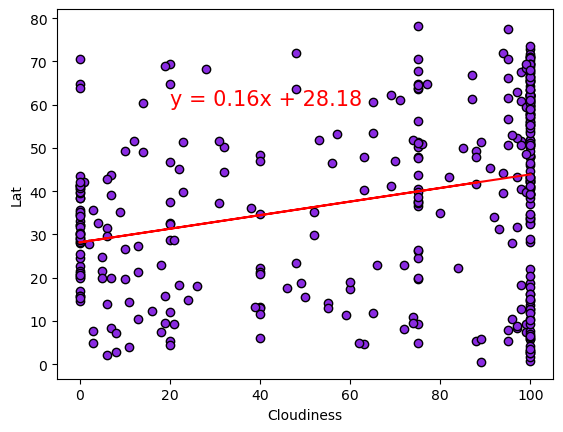

In [22]:
# Northern Hemisphere
# Northern Hemisphere
x_values = weather_data_north['Cloudiness']
y_values = weather_data_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="blueviolet", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,60),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.1190894147233189


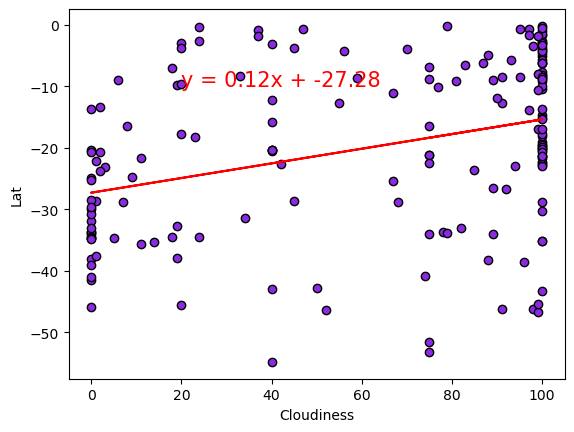

In [23]:
# Southern Hemisphere
x_values = weather_data_south['Cloudiness']
y_values = weather_data_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="blueviolet", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YThe above plot demonstrates no correlation between cloudiness and latitude.



### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00039774807092810254


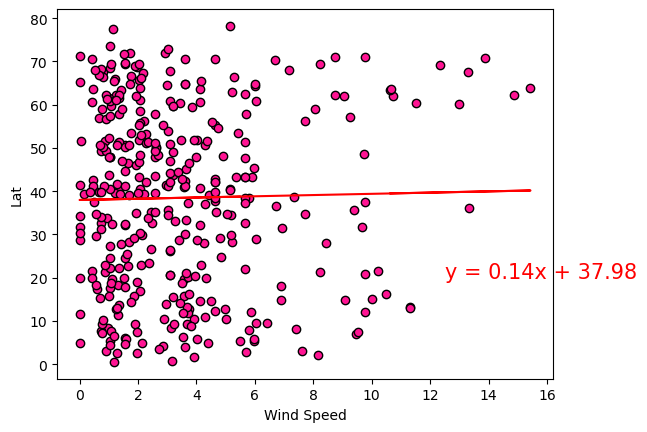

In [24]:
# Northern Hemisphere
x_values = weather_data_north['Wind Speed']
y_values = weather_data_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="deeppink", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12.5,20),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.18114823878501005


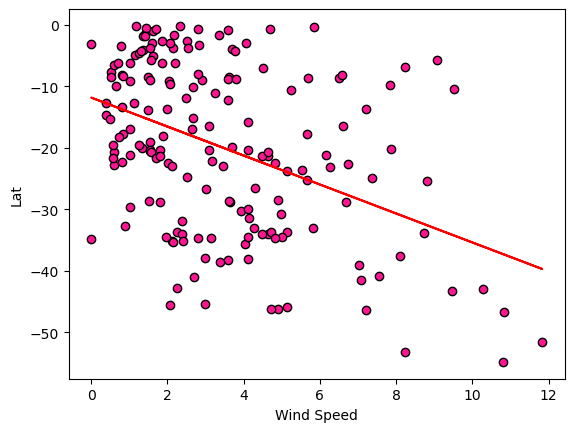

In [25]:
# Southern Hemisphere
x_values = weather_data_south['Wind Speed']
y_values = weather_data_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="deeppink", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
This plot demonstrates little to no correlation between wind speed and latitude in the northern hemisphere. 